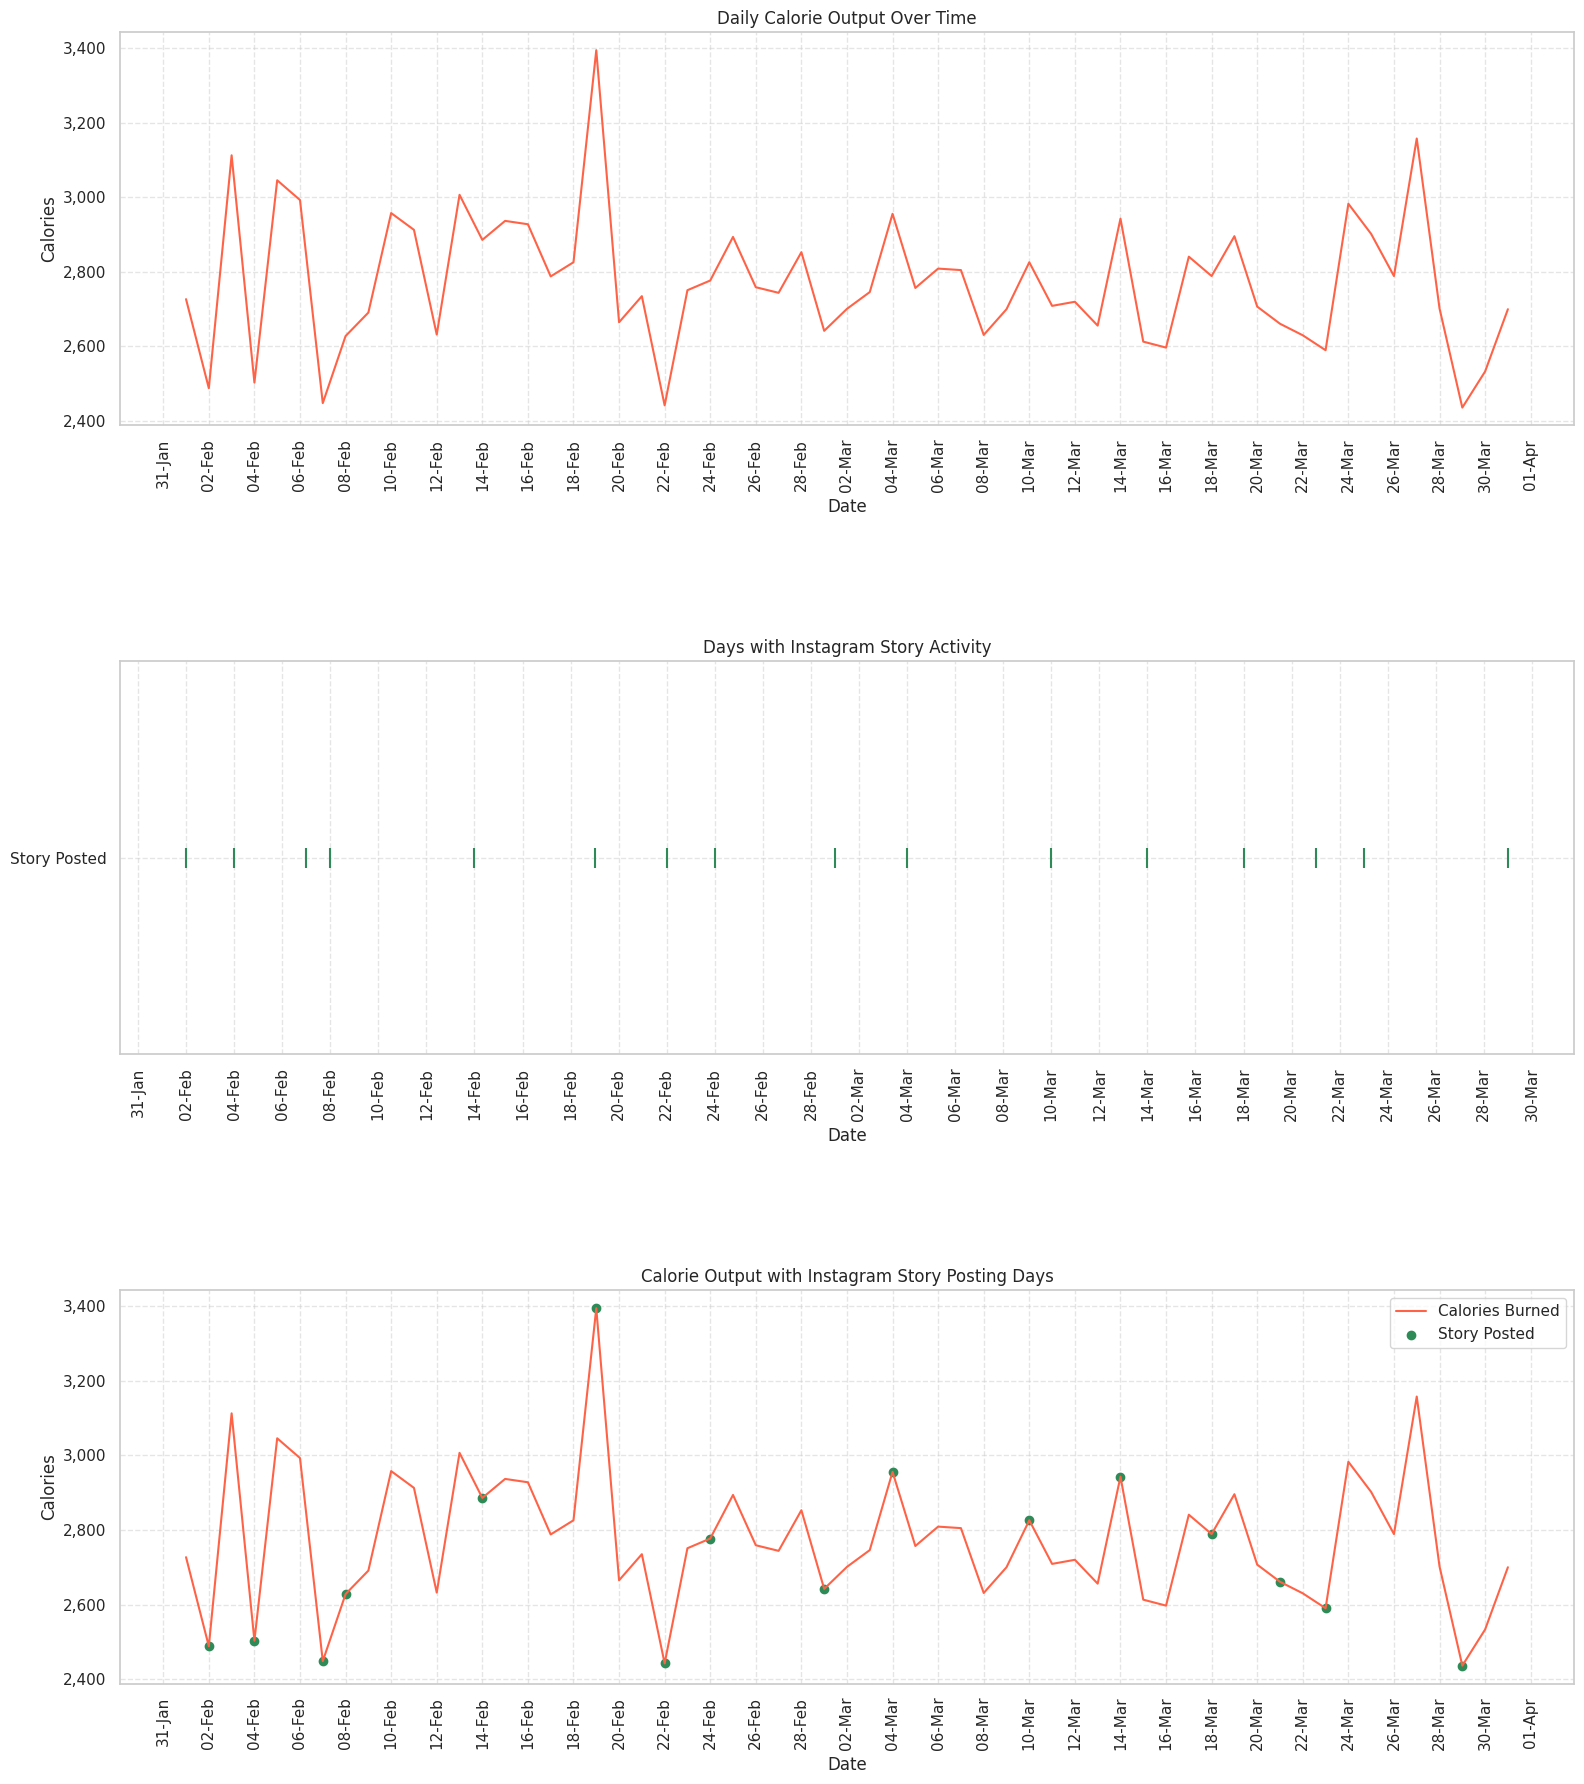

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Load your data
df = pd.read_excel("Data.xlsx")

# Clean and prepare
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
df = df.dropna(subset=["Date"])
df["Story_Posted_Binary"] = (df["Story_Posted"] > 0).astype(int)
posted_days = df[df["Story_Posted_Binary"] == 1]

# Setup style
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(16, 18))  # or increase height to 20 if needed

# 1. Line plot: Calorie Output
sns.lineplot(ax=axes[0], data=df, x="Date", y="Calorie_Output", color="tomato")
axes[0].set_title("Daily Calorie Output Over Time")
axes[0].set_ylabel("Calories")
axes[0].set_xlabel("Date")
axes[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
axes[0].tick_params(axis='x', rotation=90)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 2. Dot strip: Days with Story Posts
axes[1].scatter(posted_days["Date"], [1]*len(posted_days), color="seagreen", marker='|', s=200)
axes[1].set_title("Days with Instagram Story Activity")
axes[1].set_yticks([1])
axes[1].set_yticklabels(["Story Posted"])
axes[1].set_xlabel("Date")
axes[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
axes[1].tick_params(axis='x', rotation=90)

# 3. Combined plot: Calories + Story Posting Dots
sns.lineplot(ax=axes[2], data=df, x="Date", y="Calorie_Output", color="tomato", label="Calories Burned")
axes[2].scatter(posted_days["Date"], posted_days["Calorie_Output"], color="seagreen", label="Story Posted")
axes[2].set_title("Calorie Output with Instagram Story Posting Days")
axes[2].set_ylabel("Calories")
axes[2].set_xlabel("Date")
axes[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
axes[2].tick_params(axis='x', rotation=90)
axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[2].legend()

# Apply grid to all plots
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

# Fix overlapping titles
plt.tight_layout()
plt.subplots_adjust(hspace=0.6)

# Show the figure
plt.show()
